### SHAP Explainability Visualization Notebook

###  Load Model and Libraries

In [1]:
import pandas as pd
import shap
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
import os

C:\Users\Revanth\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Load test data

In [2]:
X_test = pd.read_csv('../../data/processed/X_test_scaled.csv')

### Load trained XGBoost model

In [3]:
with open('../../src/models/xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)


### Create SHAP TreeExplainer and compute SHAP values

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

SHAP values shape: (240, 26, 3)
X_test shape: (240, 26)



Class 2 Summary Plot


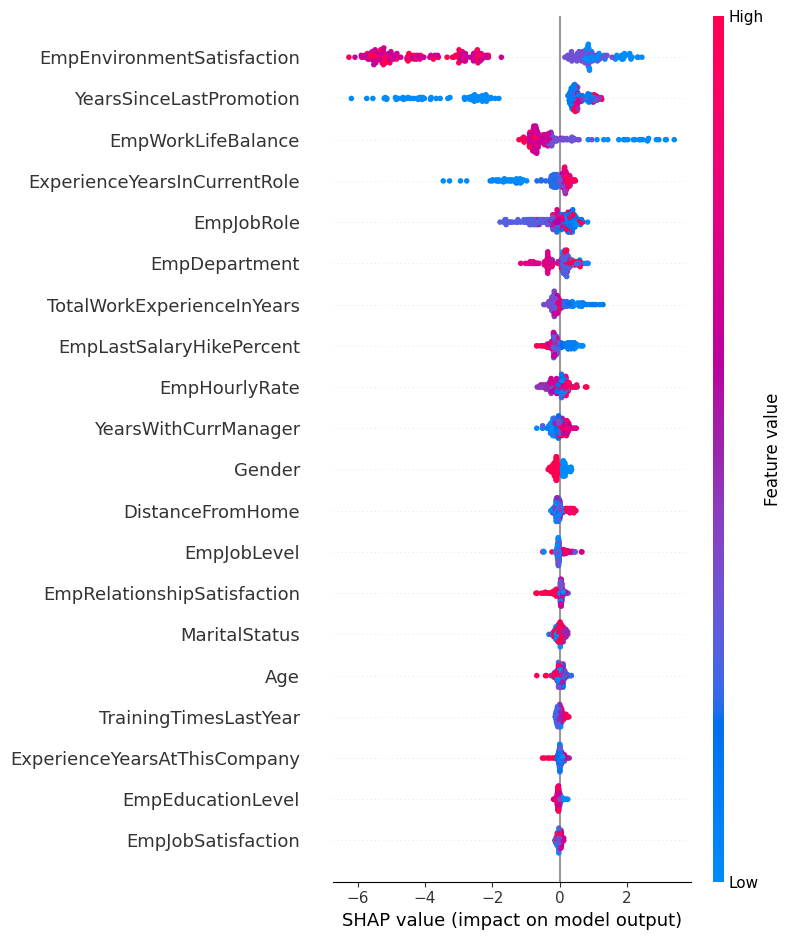


Class 3 Summary Plot


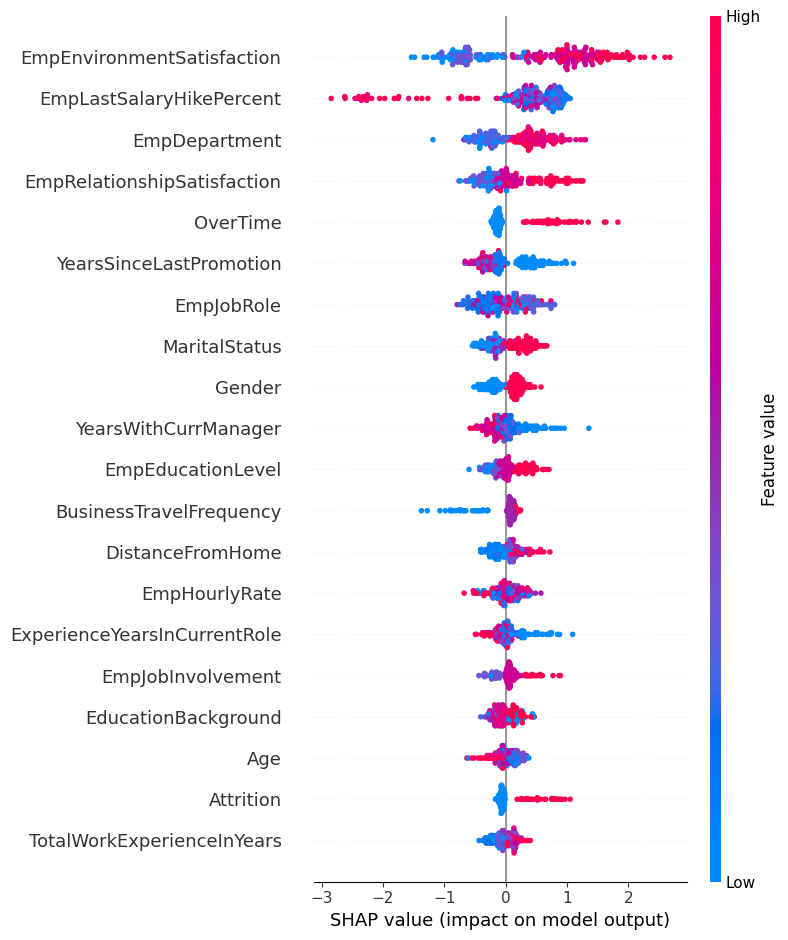


Class 4 Summary Plot


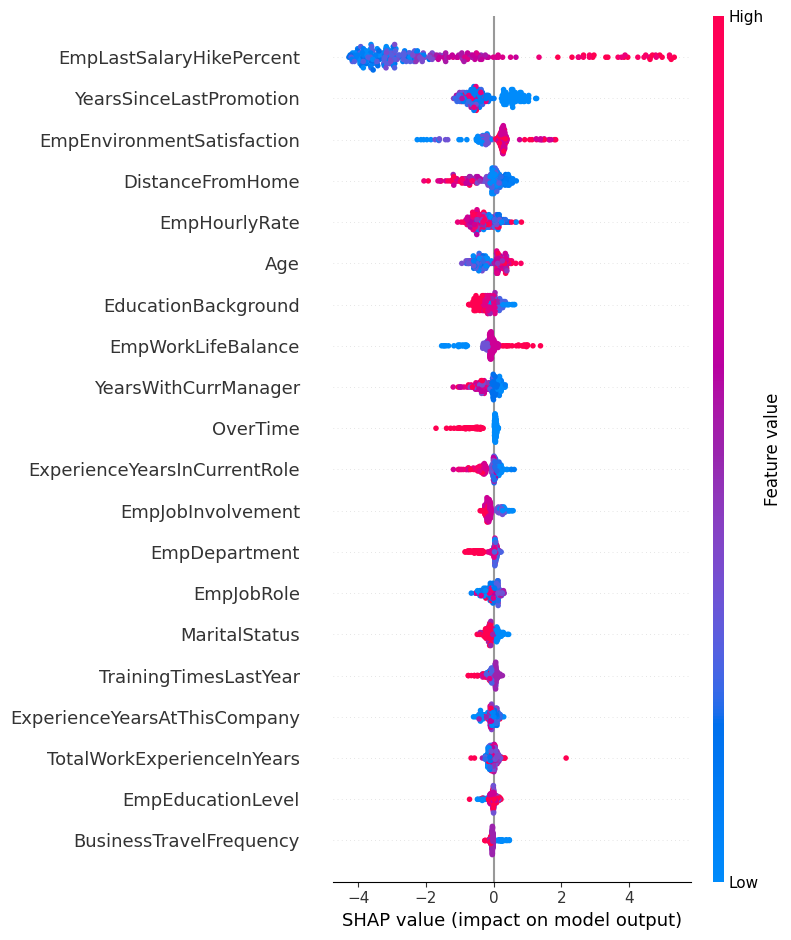

In [5]:
##  Global SHAP Summary Plots for Each Class

# Dot summary plots for each performance class
for i, cls in enumerate([2, 3, 4]):
    print(f"\nClass {cls} Summary Plot")
    shap.summary_plot(shap_values[:, :, i], X_test, plot_type='dot')

In [6]:
## Comparative SHAP Feature Importance (Bar Charts)
# Create folder for saving figures
os.makedirs('../../reports/figures', exist_ok=True)

In [7]:
# Bar plots for each class
for i, label in enumerate(['Class 2', 'Class 3', 'Class 4']):
    shap.summary_plot(shap_values[:, :, i], X_test, plot_type='bar', show=False)
    plt.title(f"Top SHAP Feature Importance - {label}")
    plt.tight_layout()
    plt.savefig(f"../../reports/figures/shap_bar_{label.replace(' ', '_').lower()}.png")
    plt.close()
    print(f" Saved SHAP bar plot for {label}")

 Saved SHAP bar plot for Class 2
 Saved SHAP bar plot for Class 3
 Saved SHAP bar plot for Class 4


In [8]:
## SHAP Waterfall Plots for Individual Instances
# Waterfall plots for class-specific insights
for index in [0, 50, 100]:
    for class_index, class_label in enumerate([2, 3, 4]):
        plt.figure()
        shap.plots._waterfall.waterfall_legacy(
            explainer.expected_value[class_index],
            shap_values[index, :, class_index],
            X_test.iloc[index],
            show=False
        )
        plt.title(f"Waterfall Plot - Instance {index} - Class {class_label}")
        plt.tight_layout()
        plt.savefig(f'../../reports/figures/waterfall_instance_{index}_class_{class_label}.png')
        plt.close()
        print(f" Saved Waterfall plot for Instance {index}, Class {class_label}")

 Saved Waterfall plot for Instance 0, Class 2
 Saved Waterfall plot for Instance 0, Class 3
 Saved Waterfall plot for Instance 0, Class 4
 Saved Waterfall plot for Instance 50, Class 2
 Saved Waterfall plot for Instance 50, Class 3
 Saved Waterfall plot for Instance 50, Class 4
 Saved Waterfall plot for Instance 100, Class 2
 Saved Waterfall plot for Instance 100, Class 3
 Saved Waterfall plot for Instance 100, Class 4


<Figure size 640x480 with 0 Axes>

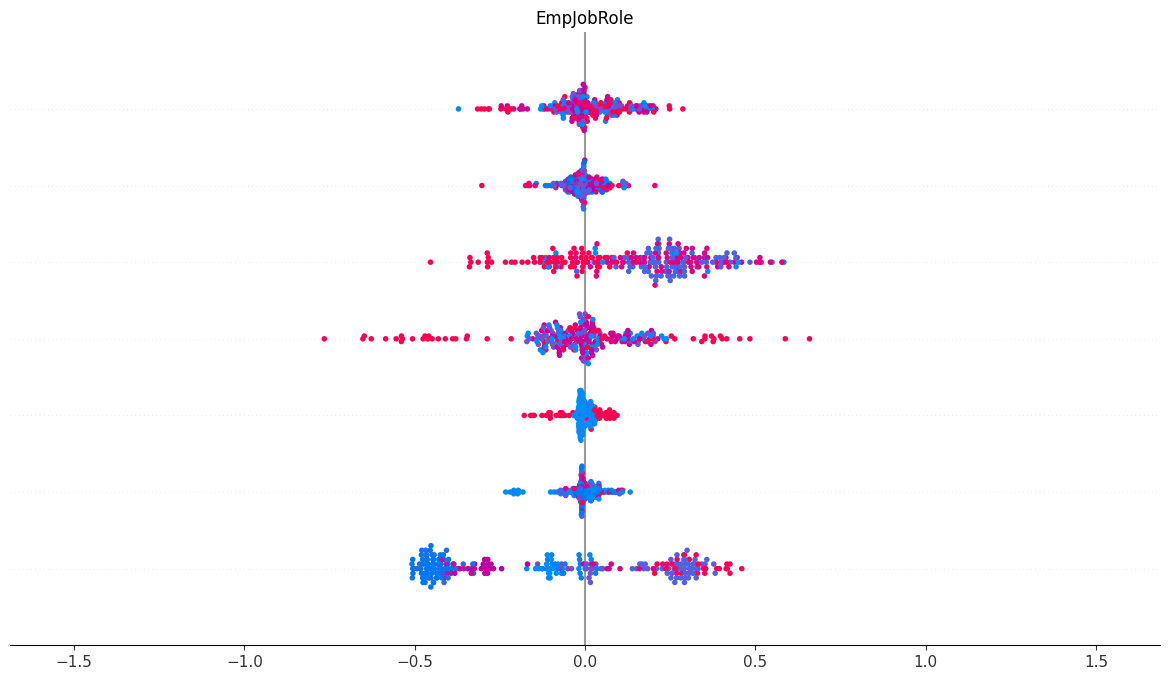

In [9]:
#  Compute interaction values (optional, for summary plot only)
interaction_values = explainer.shap_interaction_values(X_test)

#  Summary interaction plot for class 3 (index 1)
shap.summary_plot(interaction_values[:, :, :, 1], X_test)

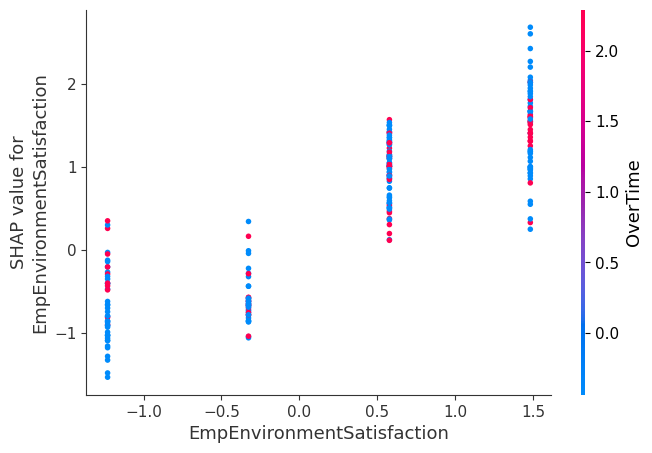

In [10]:
# Use standard shap_values, not interaction values
shap.dependence_plot(
    'EmpEnvironmentSatisfaction',
    shap_values[:, :, 1],  # class 3 SHAP values
    X_test,
    interaction_index='OverTime'  # Show how it interacts with OverTime
)


### Conclusion
SHAP visualizations above provide both global and local insights into how the XGBoost model evaluates employee performance. Interaction plots further highlight dependencies between feature pairs. These insights can support HR decision-making and model transparency.
- Summary and bar plots show feature importance by class.
- Waterfall plots explain individual predictions.
- Dependence and interaction plots highlight interactions between features.
